In [1]:
import pandas as pd

data = pd.read_csv('data/new_product_info.csv')

In [2]:
import joblib

# Load the saved model
final_model = joblib.load("data/model/random_forest_model.pkl")

classifier = final_model
print("Model loaded successfully!")

Model loaded successfully!


In [3]:
import re

concern_chems = []
red_list = []
the_gens = []

# Function to normalize ingredient names
def normalize_ingredient(ingredient):
    ingredient = ingredient.lower()  # Convert to lowercase
    ingredient = re.sub(r'[-.,/]+', ' ', ingredient)  # Replace separators with space
    ingredient = re.sub(r'\s+', ' ', ingredient).strip()  # Remove extra spaces
    return ingredient


# Input ingredients (list of ingredients to check)
input_ingredients = [
    "AQUA/WATER/EAU", "SODIUM LAURETH SULFATE", "DIMETHICONE", "LAURYL GLUCOSIDE",
    "COCAMIDOPROPYL BETAINE", "ACRYLATES COPOLYMER", "SODIUM CHLORIDE", "LAURETH-4",
    "CAPRYLYL GLYCOL", "GLYCOL DISTEARATE", "GLYCERYL OLEATE", "COCO-GLUCOSIDE",
    "HYDROXYPROPYL GUAR HYDROXYPROPYLTRIMONIUM CHLORIDE", "LAURETH-23", "SODIUM HYDROXIDE",
    "CITRIC ACID", "DISODIUM EDTA", "MELALEUCA ALTERNIFOLIA LEAF (TEA TREE)",
    "PROPYLENE GLYCOL", "HUMULUS LUPULUS FLOWER EXTRACT (HOPS)",
    "SALVIA OFFICINALIS LEAF EXTRACT (SAGE)", "PARFUM/FRAGRANCE", "PHENOXYETHANOL",
    "BENZYL ALCOHOL"
]

with open("data/concern_chems.txt") as f:
    concern_chems = [line.strip() for line in f]

with open("data/red_list.txt") as f:
    red_list = [line.strip() for line in f]

with open("data/the_gens.txt") as f:
    the_gens = [line.strip() for line in f]


# Converting all lists into lower case
concern_chems1 = [normalize_ingredient(i) for i in concern_chems]
red_list1 = [normalize_ingredient(i) for i in red_list]
the_gens1 = [normalize_ingredient(i) for i in the_gens]
input_ingredients1 = [normalize_ingredient(ing) for ing in input_ingredients]


red_list_include = []
for i in input_ingredients1:
    for j in red_list1:
        if i in j:
            red_list_include.append(j)

the_gens_include = []
for i in input_ingredients1:
    for j in the_gens1:
        if i in j:
            if i not in red_list_include:
                the_gens_include.append(j)

concern_chems_include = []
for i in input_ingredients1:
    for j in concern_chems1:
        if i in j:
            if i not in red_list_include:
                if i not in the_gens_include:
                    concern_chems_include.append(j)

print("The Red List: ",red_list_include)
print("Allergens: ",the_gens_include)
print("Imerging chemicals of concern: ",concern_chems_include)

The Red List:  []
Allergens:  ['bis aminopropyl dimethicone', 'sodium hydroxide', 'phenoxyethanol', 'benzyl alcohol']
Imerging chemicals of concern:  []


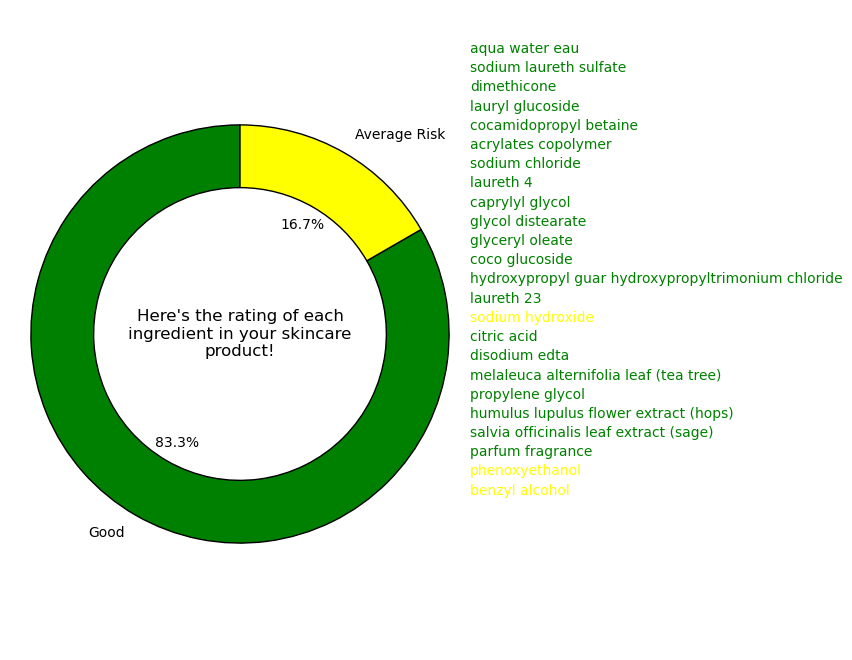

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# ... (your existing code for loading and processing ingredients) ...

# Calculate counts for visualization
high_risk_count = len(red_list_include)
average_risk_count = len(the_gens_include)
low_risk_count = len(concern_chems_include)
good_count = len(input_ingredients1) - high_risk_count - average_risk_count - low_risk_count

# Filter out zero-value categories
data = []
labels = []
colors = []

if good_count > 0:
    data.append(good_count)
    labels.append('Good')
    colors.append('green')
if average_risk_count > 0:
    data.append(average_risk_count)
    labels.append('Average Risk')
    colors.append('yellow')
if high_risk_count > 0:
    data.append(high_risk_count)
    labels.append('High Risk')
    colors.append('red')
if low_risk_count > 0:
    data.append(low_risk_count)
    labels.append('Low Risk')
    colors.append('orange')

# Visualization using Matplotlib
fig, ax = plt.subplots(figsize=(8, 8))

# Donut chart parameters
wedgeprops = {'width': 0.3, 'edgecolor': 'black'}  # Adjust width for hole size
center_circle = Circle((0, 0), 0.4, color='white')  # Circle in the center
ax.add_artist(center_circle)

# Create the pie chart (with the "donut" hole)
wedges, texts, autotexts = ax.pie(data, autopct='%1.1f%%', startangle=90,
                                  colors=colors, labels=labels, wedgeprops=wedgeprops,
                                  textprops={'color': 'black'})

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add title inside the donut hole
ax.text(0, 0, "Here's the rating of each\ningredient in your skincare\nproduct!", ha='center', va='center', fontsize=12, color='black')

# Add ingredient list (right side) if there are ingredients to display
if input_ingredients1:
    fig.subplots_adjust(right=0.7)  # Adjust right margin for ingredient list
    ax2 = fig.add_axes([0.7, 0.1, 0.25, 0.8])  # left, bottom, width, height
    ax2.axis('off')  # hide axis

    # Combine ingredients for display with correct colors
    ingredients_to_display = []
    for ing in input_ingredients1:
        if ing in red_list_include:
            ingredients_to_display.append((ing, 'red'))
        elif ing in the_gens_include:
            ingredients_to_display.append((ing, 'yellow'))
        elif ing in concern_chems_include:
            ingredients_to_display.append((ing, 'orange'))
        else:
            ingredients_to_display.append((ing, 'green'))

    # Display ingredients with color coding
    y_pos = 0.95
    for ing, color in ingredients_to_display:
        ax2.text(0, y_pos, ing, color=color, fontsize=10, va='top')
        y_pos -= 0.03  # Adjust spacing as needed

plt.show()

In [5]:
from sentence_transformers import SentenceTransformer

# Load Sentence-BERT model
model = SentenceTransformer("paraphrase-MiniLM-L6-v2")

# Example input ingredients
input_ingredients = ["Sodium Chloride, Glycerin, Helianthus Annuus (Sunflower) Seed , Fragrance/Parfum, Glyceryl Stearate, Kaolin, Sodium Stearoyl Lactylate, Cocos Nucifera (Coconut) , Water/Aqua/Eau, Butyrospermum Parkii (Shea) Butter, Carthamus Tinctorius (Safflower) Seed , Glyceryl Stearate SE, Tocopherol, Caprylic/Capric Triglyceride, Rosa Canina Fruit , Melia Azadirachta Leaf Extract, Melia Azadirachta Flower Extract, Corallina Officinalis Extract, Himanthalia Elongata Extract, Raphanus Sativus (Radish) Root Extract, Maltodextrin, Coccinia Indica Fruit Extract, Gardenia Florida Fruit Extract, Solanum Melongena (Eggplant) Fruit Extract, Aloe Barbadensis Flower Extract, Simmondsia Chinensis (Jojoba) Seed , Curcuma Longa (Turmeric) Root Extract, Ocimum Basilicum (Basil) Flower/Leaf Extract, Ocimum Sanctum Leaf Extract."]

# Preprocess the input ingredients
processed_input = " ".join([ingredient.lower().strip() for ingredient in input_ingredients])

# Compute the embedding for the input
input_embedding = model.encode(processed_input, convert_to_tensor=True)

Loading the trained word2vec model

In [6]:
from gensim.models import Word2Vec

# Load the trained Word2Vec model
word2vec_model = Word2Vec.load("data/model/word2vec_model.model")

In [7]:
from gensim.utils import simple_preprocess
import numpy as np

def get_sentence_vector(model, sentence):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)  # Take the average of word vectors
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no words match

# Figuring out the category using the pre-trained model

cat_pred_ingredients = "Sodium Chloride, Glycerin, Helianthus Annuus (Sunflower) Seed , Fragrance/Parfum, Glyceryl Stearate, Kaolin, Sodium Stearoyl Lactylate, Cocos Nucifera (Coconut) , Water/Aqua/Eau, Butyrospermum Parkii (Shea) Butter, Carthamus Tinctorius (Safflower) Seed , Glyceryl Stearate SE, Tocopherol, Caprylic/Capric Triglyceride, Rosa Canina Fruit , Melia Azadirachta Leaf Extract, Melia Azadirachta Flower Extract, Corallina Officinalis Extract, Himanthalia Elongata Extract, Raphanus Sativus (Radish) Root Extract, Maltodextrin, Coccinia Indica Fruit Extract, Gardenia Florida Fruit Extract, Solanum Melongena (Eggplant) Fruit Extract, Aloe Barbadensis Flower Extract, Simmondsia Chinensis (Jojoba) Seed , Curcuma Longa (Turmeric) Root Extract, Ocimum Basilicum (Basil) Flower/Leaf Extract, Ocimum Sanctum Leaf Extract."

# Tokenize and generate embeddings
new_tokens = simple_preprocess(cat_pred_ingredients)
new_embedding = get_sentence_vector(word2vec_model, new_tokens).reshape(1, -1)

# Predict the category
predicted_category = classifier.predict(new_embedding)
print("Predicted Primary Category:", predicted_category[0])

Predicted Primary Category: Skincare


In [8]:
import json
import torch
from torch.nn.functional import cosine_similarity

def compute_similarity(input_emb, product_emb):
    return cosine_similarity(input_emb, product_emb, dim=0).item()

# Load the CSV files
ingredients_data = pd.read_csv("data/embeddings/ingredients_embedding.csv")
concern_chems_data = pd.read_csv("data/embeddings/concern_chems_embedding.csv")
red_list_data = pd.read_csv("data/embeddings/red_list_embedding.csv")
the_gens_data = pd.read_csv("data/embeddings/the_gens_embedding.csv")

# Re-assignng the original file to a variable
original_data = pd.read_csv('data/new_product_info.csv')

# Convert JSON string embeddings back to tensors
ingredients_data["ingredients_embedding"] = ingredients_data["ingredients_embedding"].apply(lambda x: torch.tensor(json.loads(x)))
concern_chems_data["concern_chems_embedding"] = concern_chems_data["concern_chems_embedding"].apply(lambda x: torch.tensor(json.loads(x)))
red_list_data["red_list_embedding"] = red_list_data["red_list_embedding"].apply(lambda x: torch.tensor(json.loads(x)))
the_gens_data["the_gens_embedding"] = the_gens_data["the_gens_embedding"].apply(lambda x: torch.tensor(json.loads(x)))

# Input primary category (assume we determine this beforehand)
input_primary_category = predicted_category[0] # Replace this with the actual category from the input

# Replace 'original_data' with the actual name of your DataFrame
filtered_data = original_data[original_data["primary_category"] == input_primary_category].copy()

# Calculate similarity scores only for filtered products
filtered_data["ingredient_similarity"] = ingredients_data["ingredients_embedding"].apply(
    lambda x: compute_similarity(input_embedding, x)
)
filtered_data["concern_chems_similarity"] = concern_chems_data["concern_chems_embedding"].apply(
    lambda x: compute_similarity(input_embedding, x)
)
filtered_data["red_list_similarity"] = red_list_data["red_list_embedding"].apply(
    lambda x: compute_similarity(input_embedding, x)
)
filtered_data["the_gens_similarity"] = the_gens_data["the_gens_embedding"].apply(
    lambda x: compute_similarity(input_embedding, x)
)

# Combine scores: prioritize high ingredient similarity and low harmful similarity
filtered_data["final_score"] = (
    filtered_data["ingredient_similarity"] - filtered_data["concern_chems_similarity"] - filtered_data["red_list_similarity"] - filtered_data["the_gens_similarity"]
)

In [10]:
# Sort by the final score (descending)
recommended_products = filtered_data.sort_values(by="final_score", ascending=False)

# Get the top product
top_product = recommended_products.iloc[0]
print("Recommended Product:")
print(f"Name: {top_product['product_name']}")
print(f"Chemicals of concern: {top_product['concerning_chems_detected']}")
print(f"ASTHMAGENS, ALLERGENS, & IRRITANTS: {top_product['allergens_detected']}")
print(f"Highly Harmful ingredients: {top_product['red_list_chems_detected']}")
print(f"Similarity Score: {top_product['final_score']}")

Recommended Product:
Name: Coconut Milk Bath Soak
Chemicals of concern: []
ASTHMAGENS, ALLERGENS, & IRRITANTS: []
Highly Harmful ingredients: []
Similarity Score: 0.8410821631550789
